<center>
<img src="https://laelgelcpublic.s3.sa-east-1.amazonaws.com/lael_50_years_narrow_white.png.no_years.400px_96dpi.png" width="300" alt="LAEL 50 years logo">
<h3>APPLIED LINGUISTICS GRADUATE PROGRAMME (LAEL)</h3>
</center>
<hr>

# Corpus Linguistics - Study 4 - Phase 2 - eyamrog

The aim of this phase is to calculate the `QJPP`, `EL2AP`, and `EL2AP` registers mean dimension scores.

## Definitions

### Corpora

- `QJPP` - Quality Journals Published Papers: Published Papers Reference Corpus
- `EL2AP` - English-as-L2 Authored Papers: Human-Authored Target Corpus extracted from the SciELO Preprints archive
- `AI-EL2AP` - AI English-as-L2 Authored Papers: AI-Generated Target Corpus

### Multi-Dimensional Analysis of English (Biber, 1988) five major dimensions of variation

- `Dimension 1` - Involved versus Informational Production
- `Dimension 2` - Narrative Concerns
- `Dimension 3` - Explicit versus Situation-Dependent Reference
- `Dimension 4` - Overt Expression of Argumentation
- `Dimension 5` - Abstract versus Non-Abstract Style

## Required Python packages

- pandas
- matplotlib
- seaborn

## Import the required libraries

In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

## Define input variables

In [2]:
input_directory = 'cl_st4_ph1_eyamrog'
output_directory = 'cl_st4_ph1_eyamrog'

## Create output directory

In [3]:
# Check if the output directory already exists. If it does, do nothing. If it doesn't exist, create it.
if os.path.exists(output_directory):
    print('Output directory already exists.')
else:
    try:
        os.makedirs(output_directory)
        print('Output directory successfully created.')
    except OSError as e:
        print('Failed to create the directory:', e)
        sys.exit(1)

Output directory already exists.


## Calculate the mean dimension score

In [4]:
def mean_dimension_score(dimension, source, discipline='All'):
    if discipline == 'All':
        mean_score = df_cl_st1_eyamrog_dimensions.loc[
            df_cl_st1_eyamrog_dimensions['Source'] == source,
            dimension
        ].mean()
    else:
        mean_score = df_cl_st1_eyamrog_dimensions.loc[
            (df_cl_st1_eyamrog_dimensions['Source'] == source) &
            (df_cl_st1_eyamrog_dimensions['Discipline'] == discipline),
            dimension
        ].mean()
    return mean_score

## Boxplot by Source

In [5]:
def boxplot_by_source(plot_filepath, dimension, discipline='All', source_order=None):
    if discipline == 'All':
        subset = df_cl_st1_eyamrog_dimensions.copy()
        title = f"{dimension} by Source - All Disciplines"
    else:
        subset = df_cl_st1_eyamrog_dimensions[
            df_cl_st1_eyamrog_dimensions['Discipline'] == discipline
        ]
        title = f"{dimension} by Source - {discipline}"
    
    # Create the boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=subset,
        x='Source',
        y=dimension,
        color='royalblue',
        order=source_order
    )
    plt.title(title)
    plt.ylabel(dimension)
    plt.xlabel("Source")
    plt.grid(True)
    plt.tight_layout()

    # Saving as an image
    plt.savefig(plot_filepath, dpi=300, bbox_inches='tight')

    plt.show()

## Import the data into a DataFrame

### `CL_St1_eyamrog`

In [6]:
df_cl_st1_eyamrog_dimensions = pd.read_json(f"{input_directory}/df_cl_st1_eyamrog_dimensions.jsonl", lines=True)

In [7]:
df_cl_st1_eyamrog_dimensions['Published'] = pd.to_datetime(df_cl_st1_eyamrog_dimensions['Published'], unit='ms')

## Mean Dimension Scores - Source by Discipline per Dimension

### Create the required lists

#### dimensions

In [8]:
dimensions = [col for col in df_cl_st1_eyamrog_dimensions.columns if 'Factor' in col]
dimensions

['Factor 1 Score',
 'Factor 2 Score',
 'Factor 3 Score',
 'Factor 4 Score',
 'Factor 5 Score']

In [9]:
dimension_labels = [
    'Dimension 1',
    'Dimension 2',
    'Dimension 3',
    'Dimension 4',
    'Dimension 5'
]

In [10]:
# Create a mapping from old names to new names
rename_map = dict(zip(dimensions, dimension_labels))

# Rename the columns in the DataFrame
df_cl_st1_eyamrog_dimensions = df_cl_st1_eyamrog_dimensions.rename(columns=rename_map)

In [11]:
dimensions = [col for col in df_cl_st1_eyamrog_dimensions.columns if 'Dimension' in col]
dimensions

['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5']

#### sources

In [12]:
custom_order = [
    'QJPP',
    'EL2AP',
    'AI-EL2AP'
]
sources = [src for src in custom_order if src in df_cl_st1_eyamrog_dimensions['Source'].unique()]
sources

['QJPP', 'EL2AP', 'AI-EL2AP']

#### disciplines

In [13]:
custom_order = [
    'Health Sciences',
    'Biological Sciences',
    'Human Sciences',
    'Applied Social Sciences',
    'Linguistics, literature and arts'
]
disciplines = [src for src in custom_order if src in df_cl_st1_eyamrog_dimensions['Discipline'].unique()]
disciplines = ['All'] + disciplines
disciplines

['All',
 'Health Sciences',
 'Biological Sciences',
 'Human Sciences',
 'Applied Social Sciences',
 'Linguistics, literature and arts']

### Mean Dimension Scores

In [14]:
# Build the nested dictionary
mean_dimension_score_dict = {
    dim: {
        f"{disc} {src}": mean_dimension_score(dim, src, disc)
        for disc in disciplines
        for src in sources
    }
    for dim in dimensions
}

In [15]:
df_mean_dimension_score = pd.DataFrame(mean_dimension_score_dict)

In [16]:
df_mean_dimension_score

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
All QJPP,-20.897359,-3.154712,3.507686,-4.082111,3.925807
All EL2AP,-20.371455,-3.414837,4.094472,-4.006963,3.887754
All AI-EL2AP,-24.688963,-3.263897,5.696603,-3.944009,4.898743
Health Sciences QJPP,-24.337611,-2.972881,4.658104,-4.287346,3.619846
Health Sciences EL2AP,-23.031904,-3.364997,2.687128,-3.539385,3.834603
Health Sciences AI-EL2AP,-25.733081,-2.977347,3.304497,-3.608721,4.321868
Biological Sciences QJPP,-23.445301,-3.562037,3.135123,-4.325291,4.454352
Biological Sciences EL2AP,-21.930807,-3.832264,2.465169,-5.011974,3.814244
Biological Sciences AI-EL2AP,-23.782303,-3.512772,4.923414,-4.797690,5.432228
Human Sciences QJPP,-21.155323,-3.249071,1.264485,-4.576702,2.708359


#### Create a LaTeX table

In [17]:
title = 'Mean Dimension Scores - Source by Discipline per Dimension'
filename = 'df_mean_dimension_score'

In [18]:
caption = title
label = f"tab:{filename}"
tex_filename = f"{filename}.tex"

In [19]:
tex_table = df_mean_dimension_score.to_latex(index=False, float_format='%.2f', longtable=True, decimal=',', caption=caption, label=label)

In [20]:
with open(f"{output_directory}/{tex_filename}", 'w', encoding='utf8', newline='\n') as file:
    file.write(tex_table)

## Boxplots

### `Dimension 1`

#### `All` disciplines

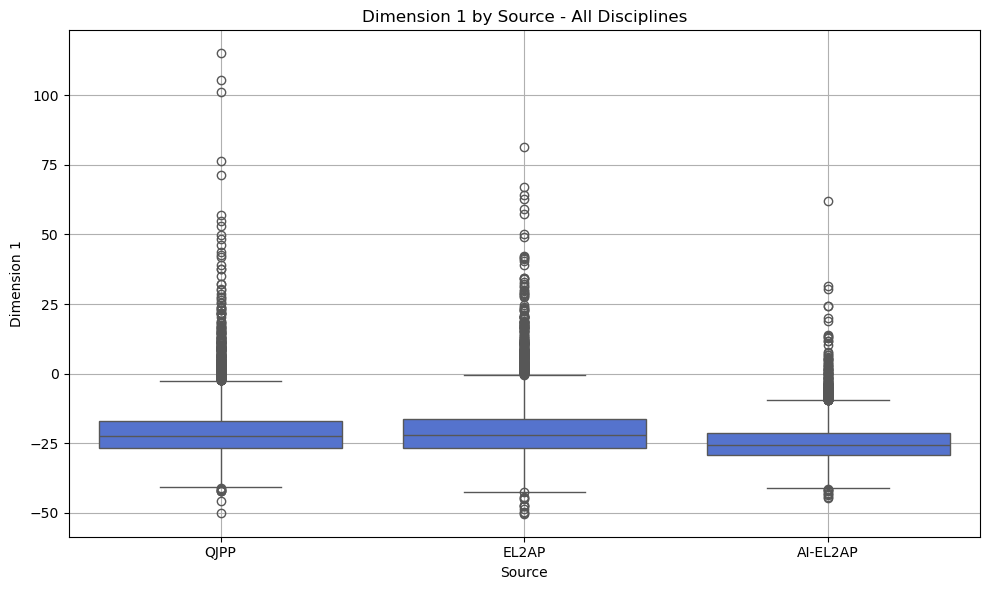

In [21]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim1_by_source_all_disciplines'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 1', 'All', source_order=custom_order)

#### `Health Sciences` discipline

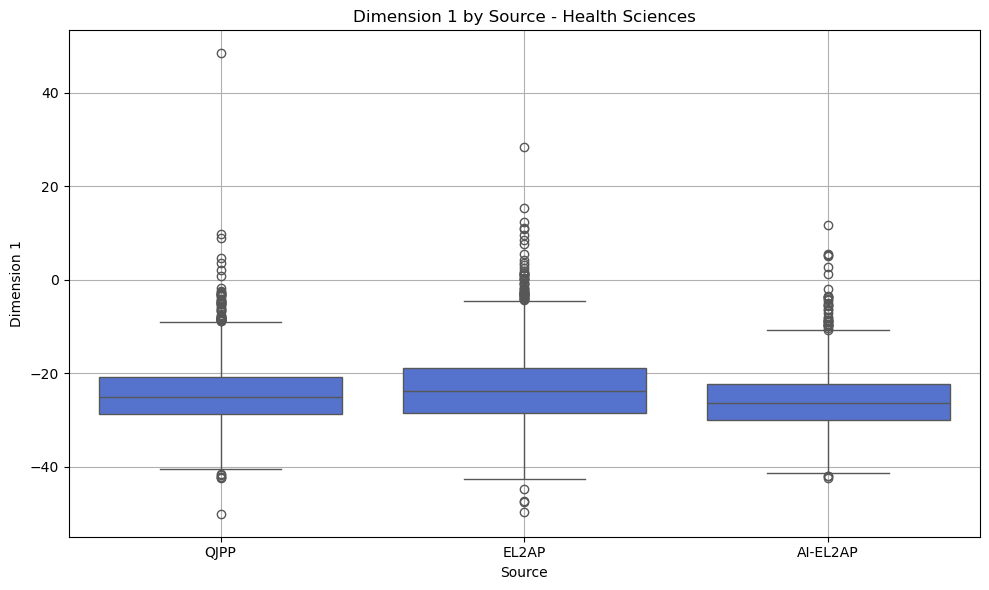

In [22]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim1_by_source_health_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 1', 'Health Sciences', source_order=custom_order)

#### `Biological Sciences` discipline

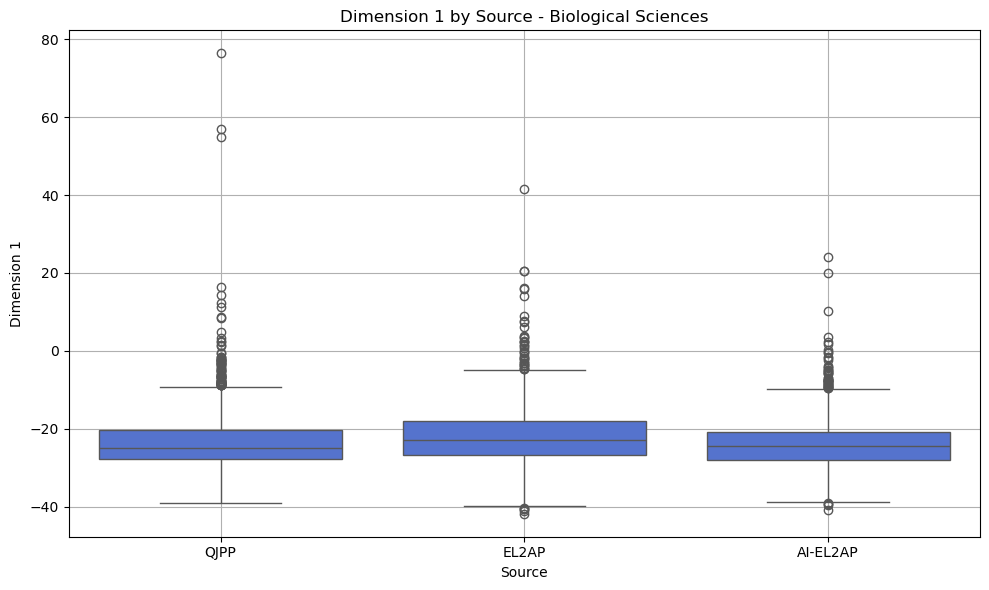

In [23]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim1_by_source_biological_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 1', 'Biological Sciences', source_order=custom_order)

#### `Human Sciences` discipline

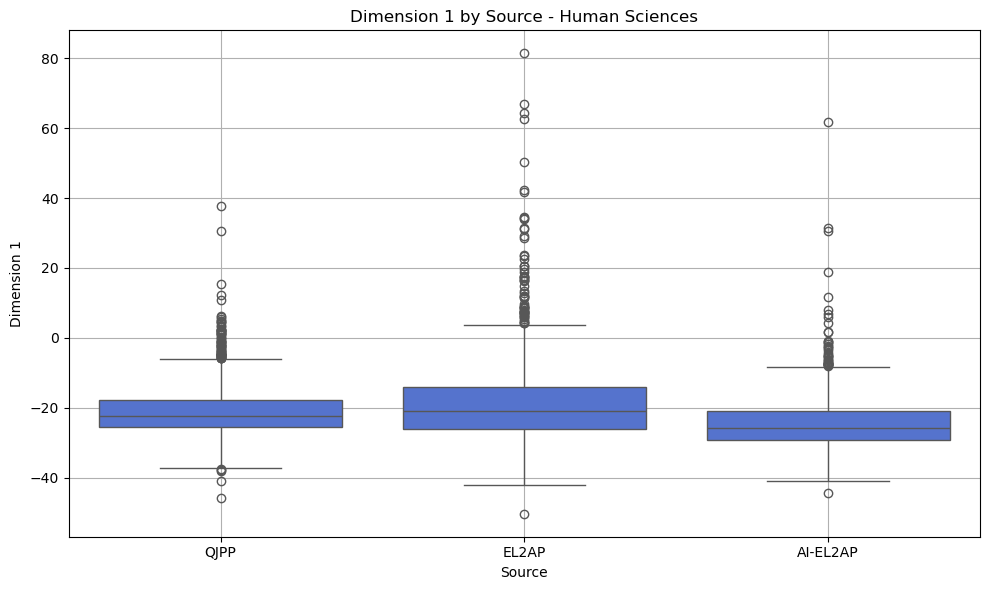

In [24]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim1_by_source_human_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 1', 'Human Sciences', source_order=custom_order)

#### `Applied Social Sciences` discipline

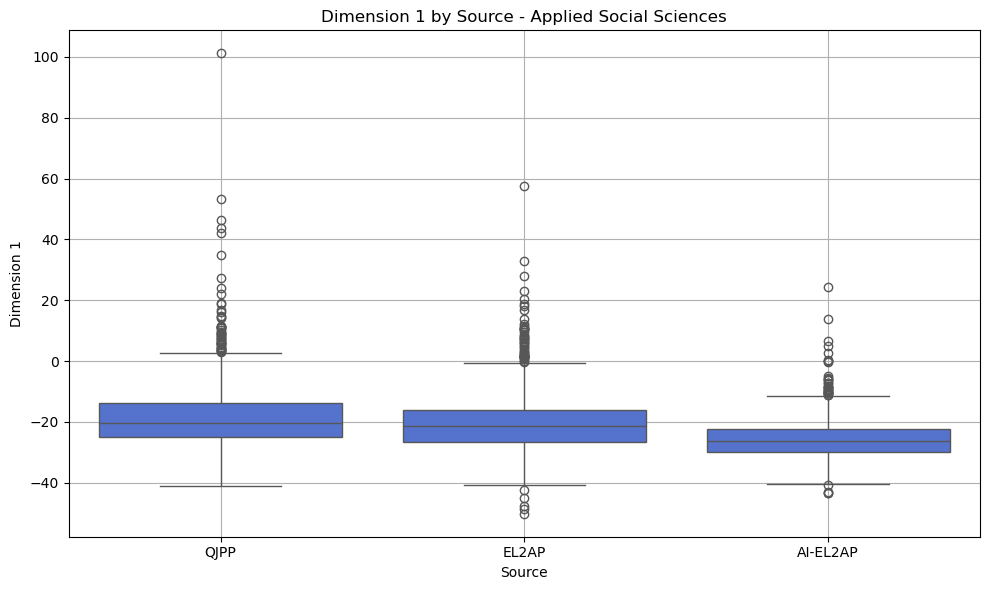

In [25]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim1_by_source_applied_social_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 1', 'Applied Social Sciences', source_order=custom_order)

#### `Linguistics, literature and arts` discipline

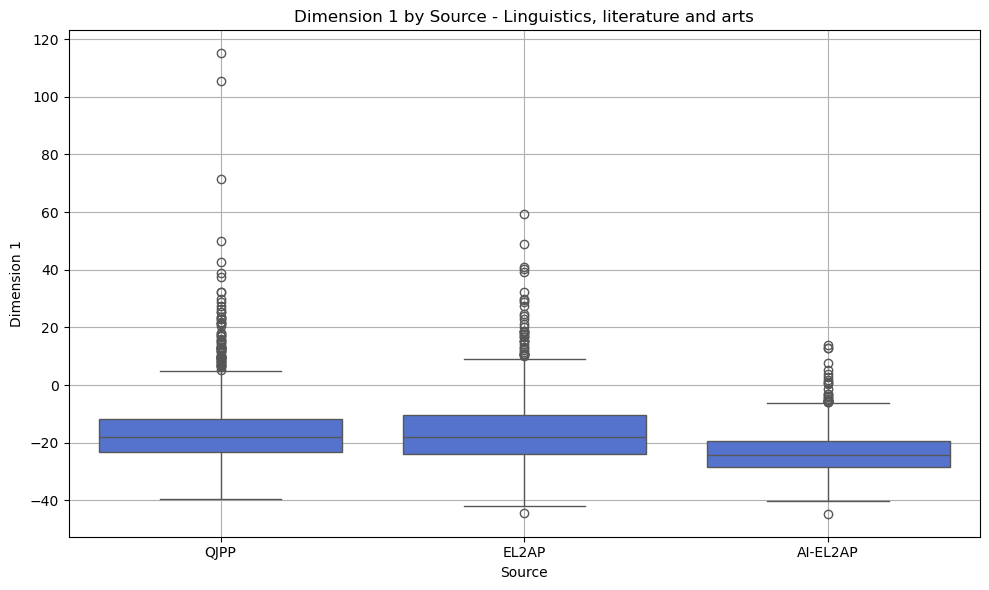

In [26]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim1_by_source_linguistics_literature_arts'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 1', 'Linguistics, literature and arts', source_order=custom_order)

### `Dimension 2`

#### `All` disciplines

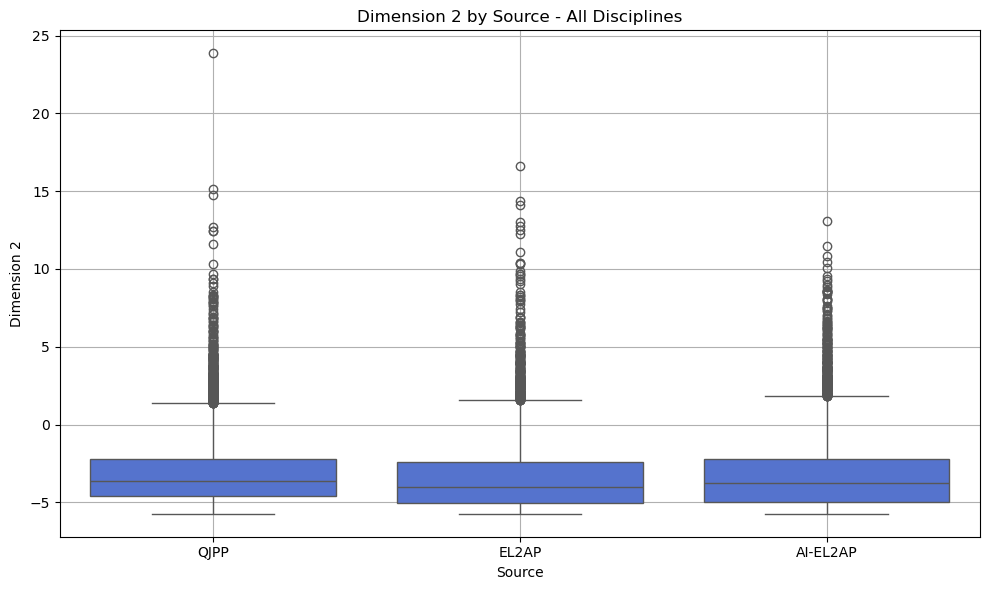

In [27]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim2_by_source_all_disciplines'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 2', 'All', source_order=custom_order)

#### `Health Sciences` discipline

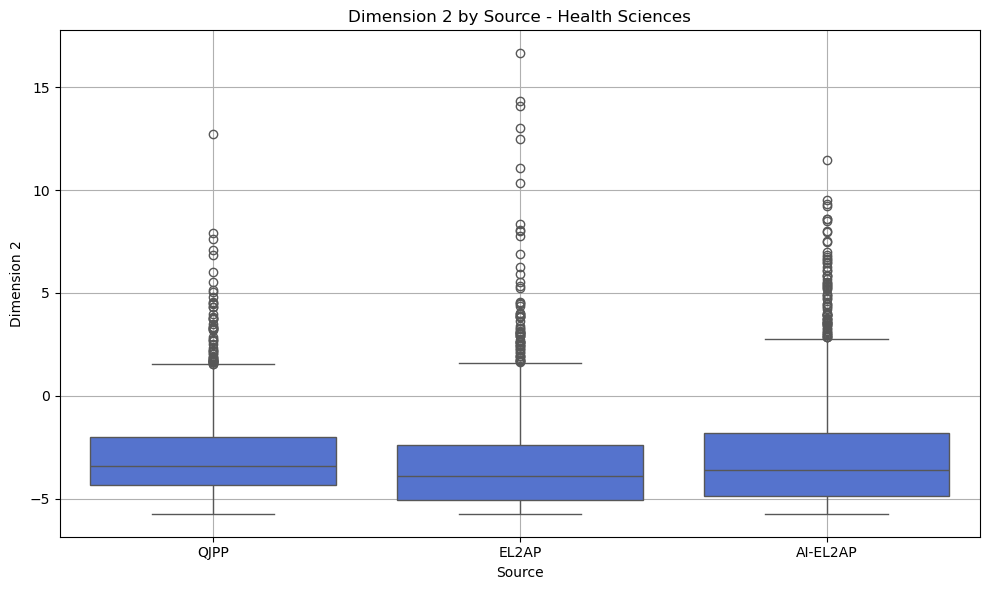

In [28]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim2_by_source_health_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 2', 'Health Sciences', source_order=custom_order)

#### `Biological Sciences` discipline

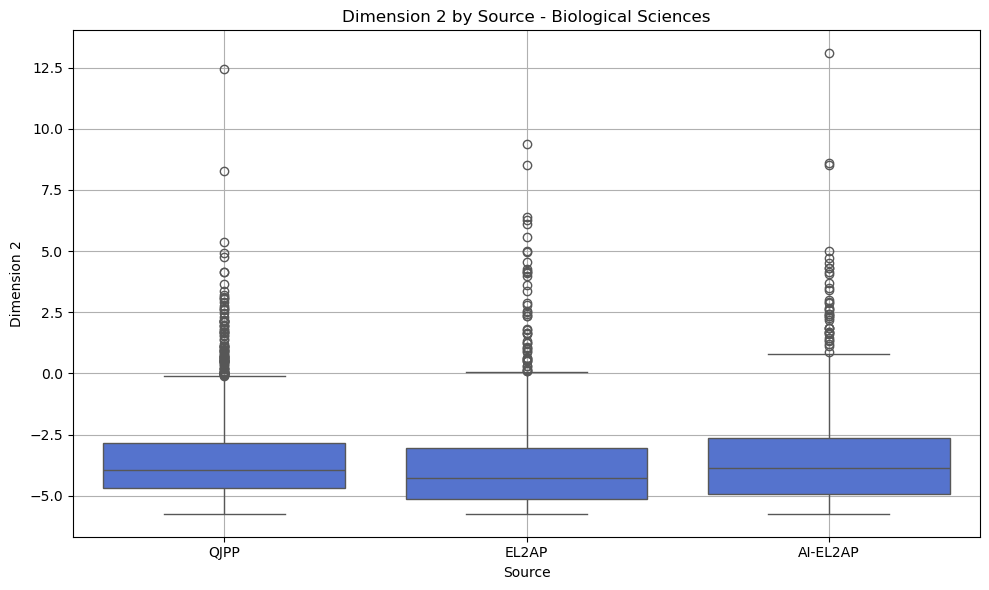

In [29]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim2_by_source_biological_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 2', 'Biological Sciences', source_order=custom_order)

#### `Human Sciences` discipline

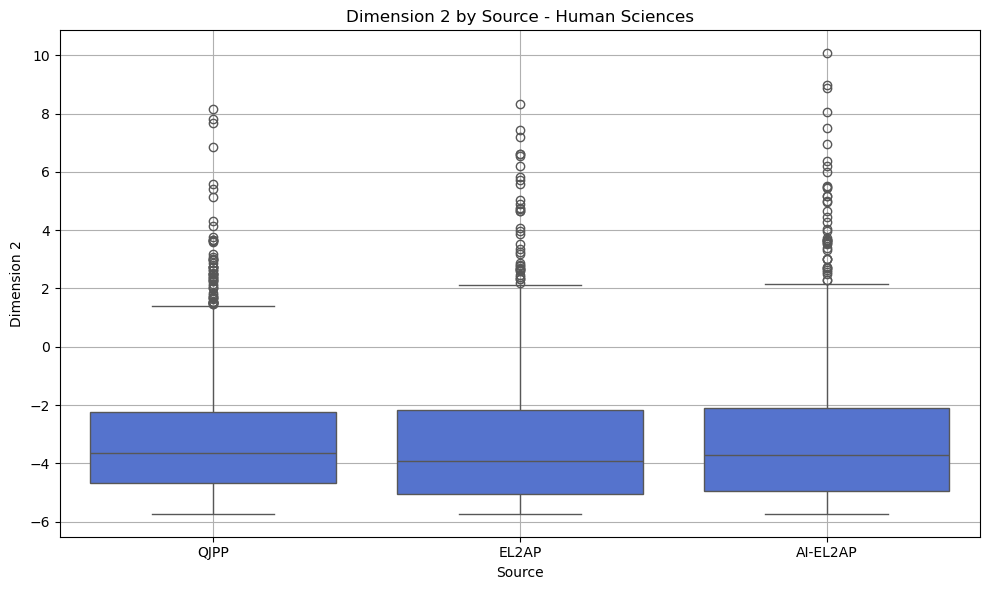

In [30]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim2_by_source_human_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 2', 'Human Sciences', source_order=custom_order)

#### `Applied Social Sciences` discipline

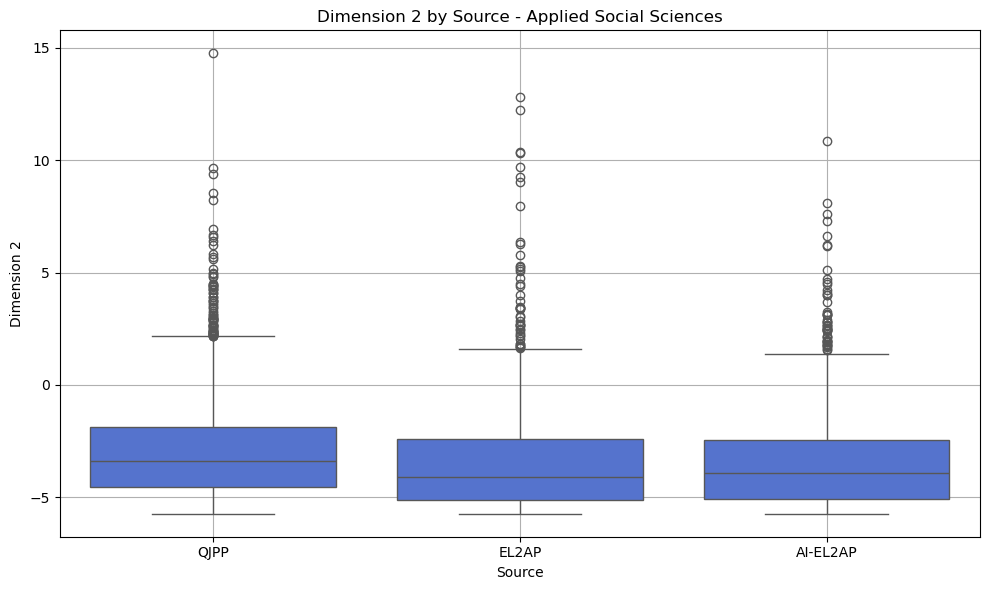

In [31]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim2_by_source_applied_social_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 2', 'Applied Social Sciences', source_order=custom_order)

#### `Linguistics, literature and arts` discipline

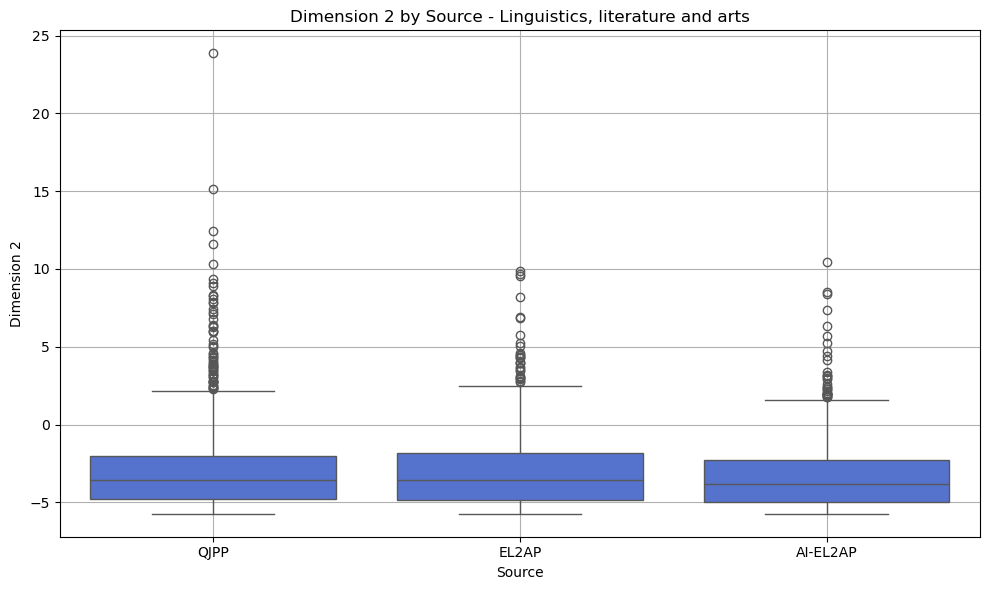

In [32]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim2_by_source_linguistics_literature_arts'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 2', 'Linguistics, literature and arts', source_order=custom_order)

### `Dimension 3`

#### `All` disciplines

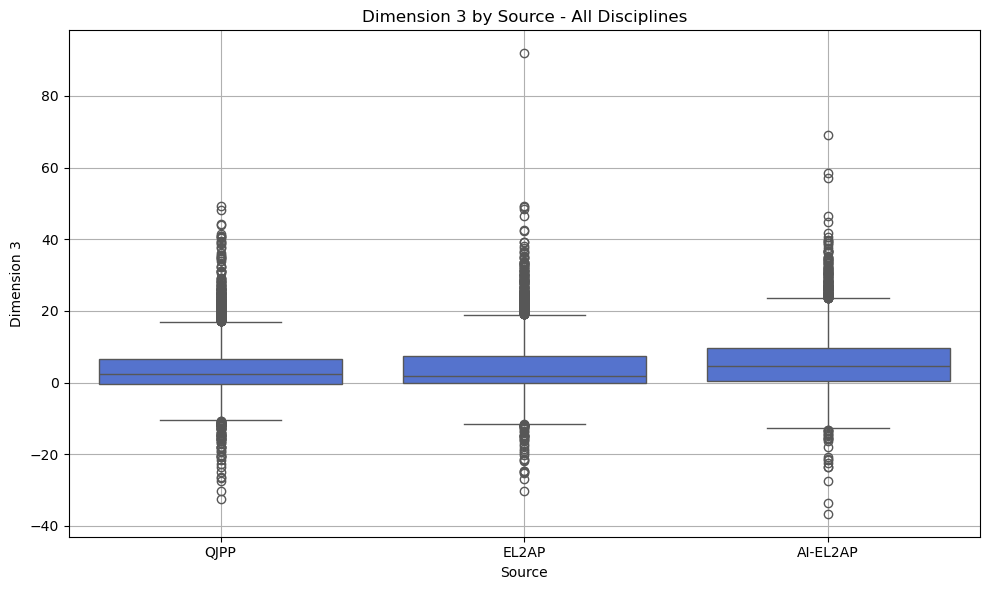

In [33]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim3_by_source_all_disciplines'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 3', 'All', source_order=custom_order)

#### `Health Sciences` discipline

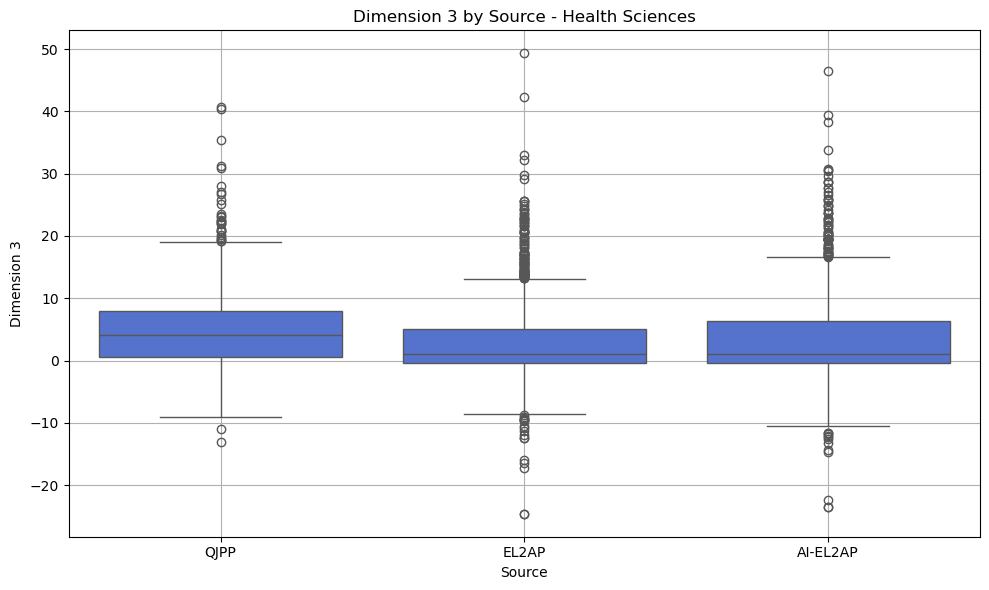

In [34]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim3_by_source_health_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 3', 'Health Sciences', source_order=custom_order)

#### `Biological Sciences` discipline

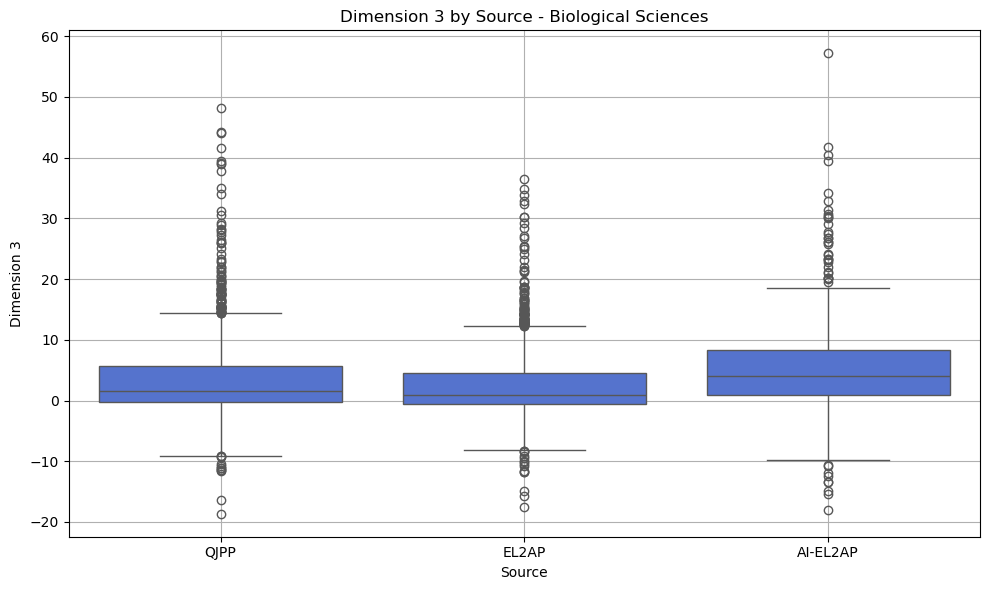

In [35]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim3_by_source_biological_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 3', 'Biological Sciences', source_order=custom_order)

#### `Human Sciences` discipline

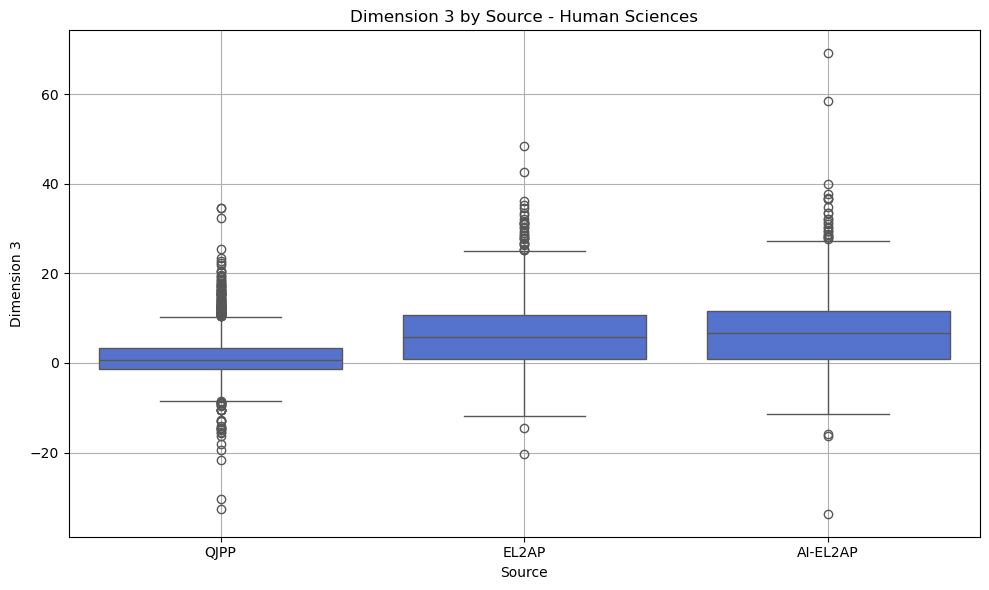

In [36]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim3_by_source_human_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 3', 'Human Sciences', source_order=custom_order)

#### `Applied Social Sciences` discipline

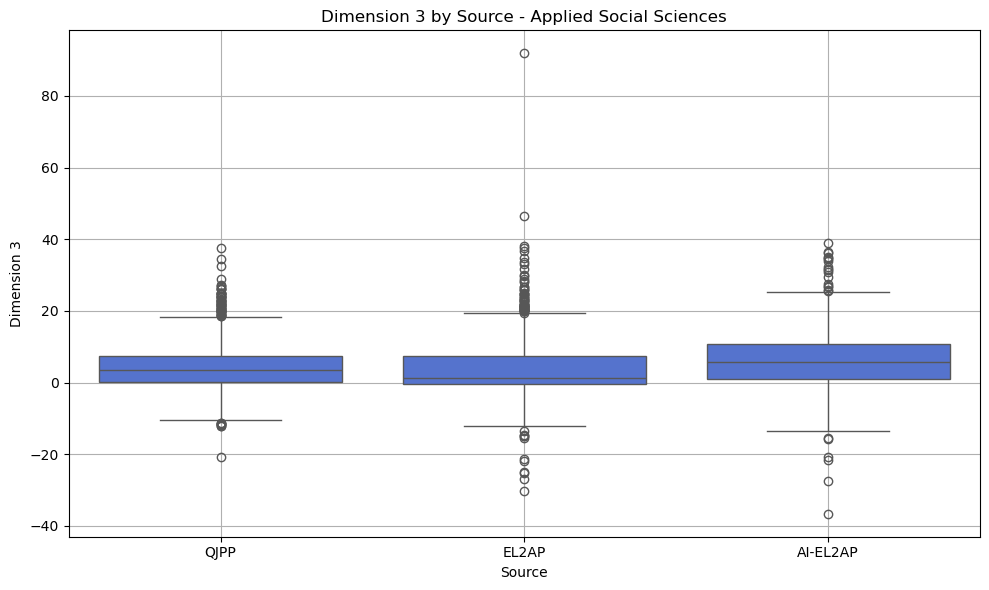

In [37]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim3_by_source_applied_social_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 3', 'Applied Social Sciences', source_order=custom_order)

#### `Linguistics, literature and arts` discipline

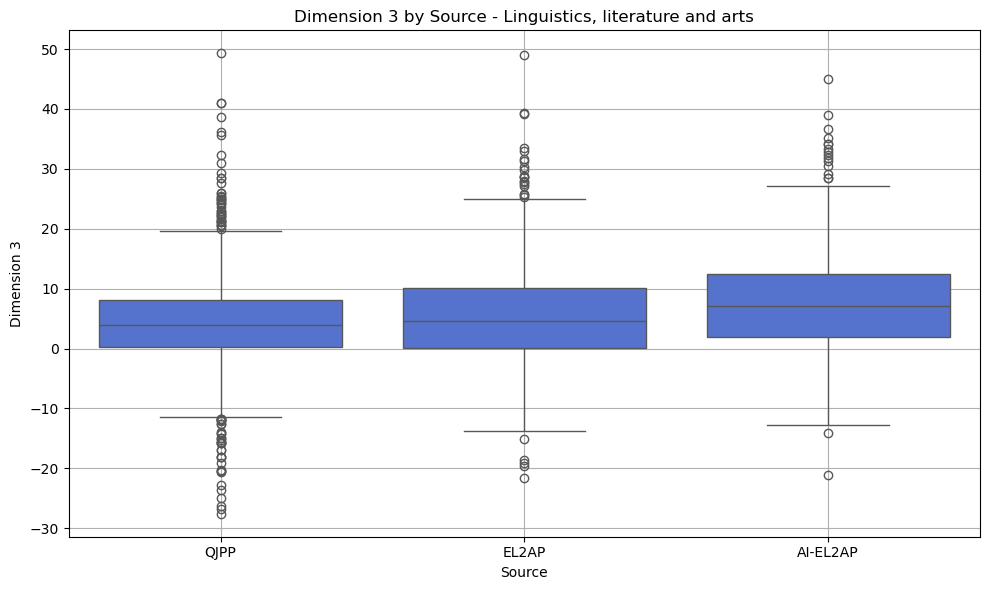

In [38]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim3_by_source_linguistics_literature_arts'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 3', 'Linguistics, literature and arts', source_order=custom_order)

### `Dimension 4`

#### `All` disciplines

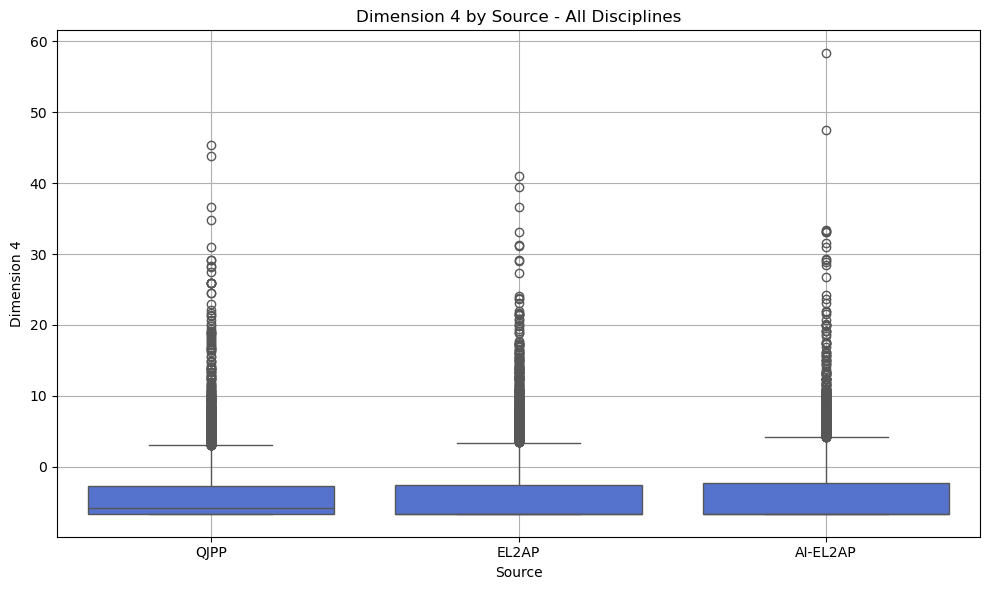

In [39]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim4_by_source_all_disciplines'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 4', 'All', source_order=custom_order)

#### `Health Sciences` discipline

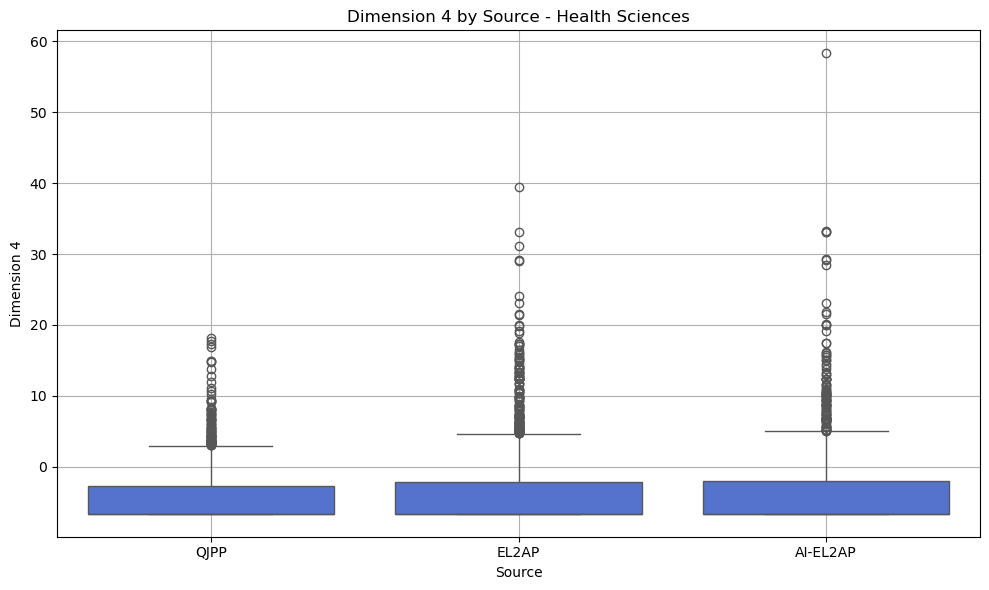

In [40]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim4_by_source_health_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 4', 'Health Sciences', source_order=custom_order)

#### `Biological Sciences` discipline

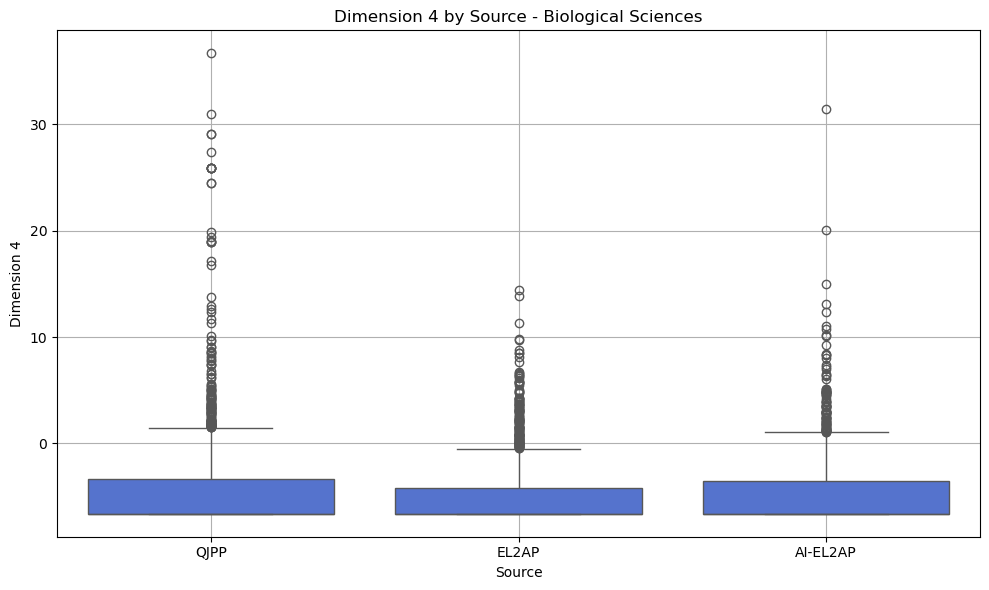

In [41]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim4_by_source_biological_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 4', 'Biological Sciences', source_order=custom_order)

#### `Human Sciences` discipline

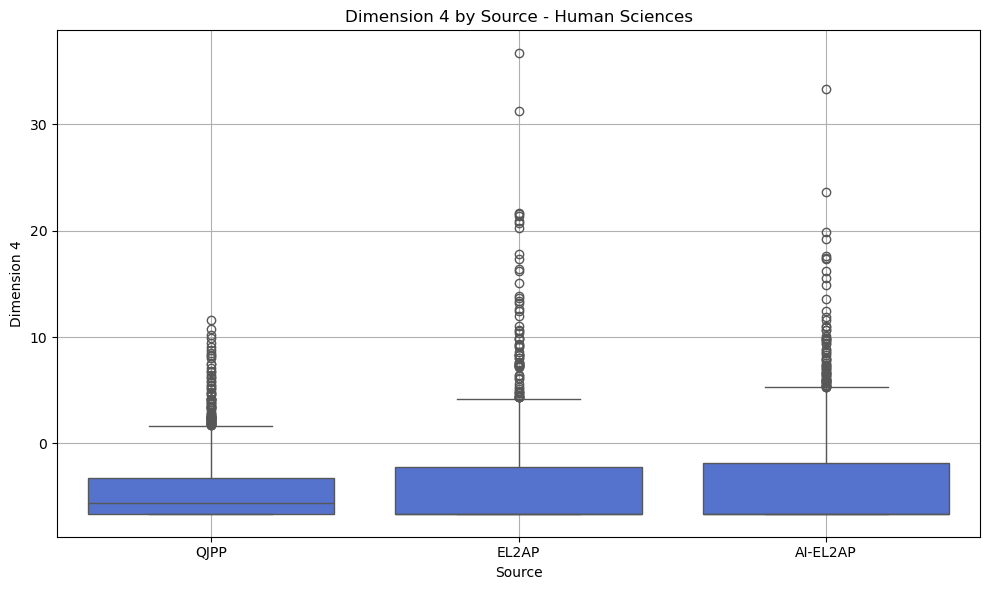

In [42]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim4_by_source_human_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 4', 'Human Sciences', source_order=custom_order)

#### `Applied Social Sciences` discipline

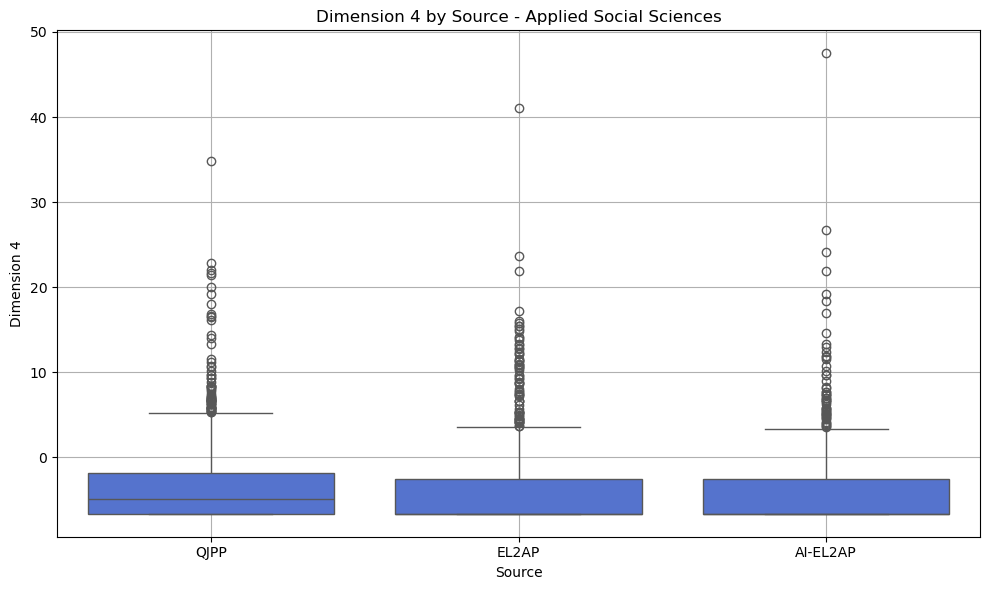

In [43]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim4_by_source_applied_social_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 4', 'Applied Social Sciences', source_order=custom_order)

#### `Linguistics, literature and arts` discipline

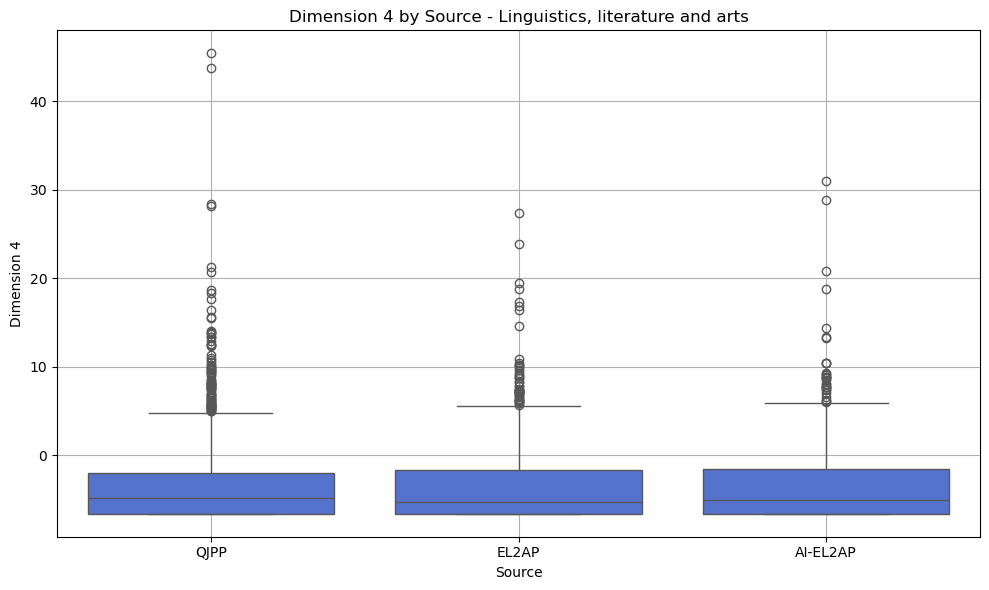

In [44]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim4_by_source_linguistics_literature_arts'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 4', 'Linguistics, literature and arts', source_order=custom_order)

### `Dimension 5`

#### `All` disciplines

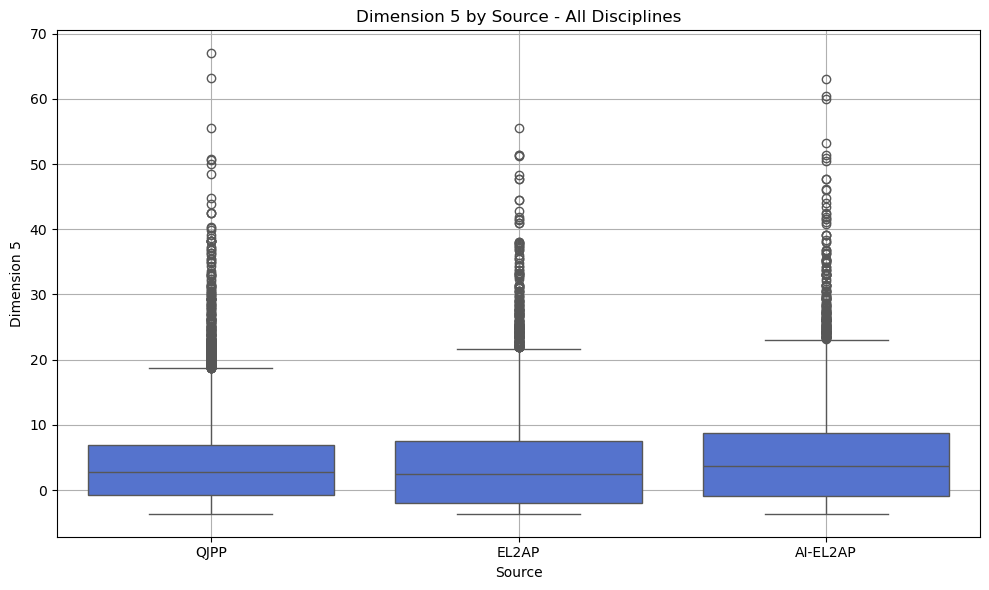

In [45]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim5_by_source_all_disciplines'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 5', 'All', source_order=custom_order)

#### `Health Sciences` discipline

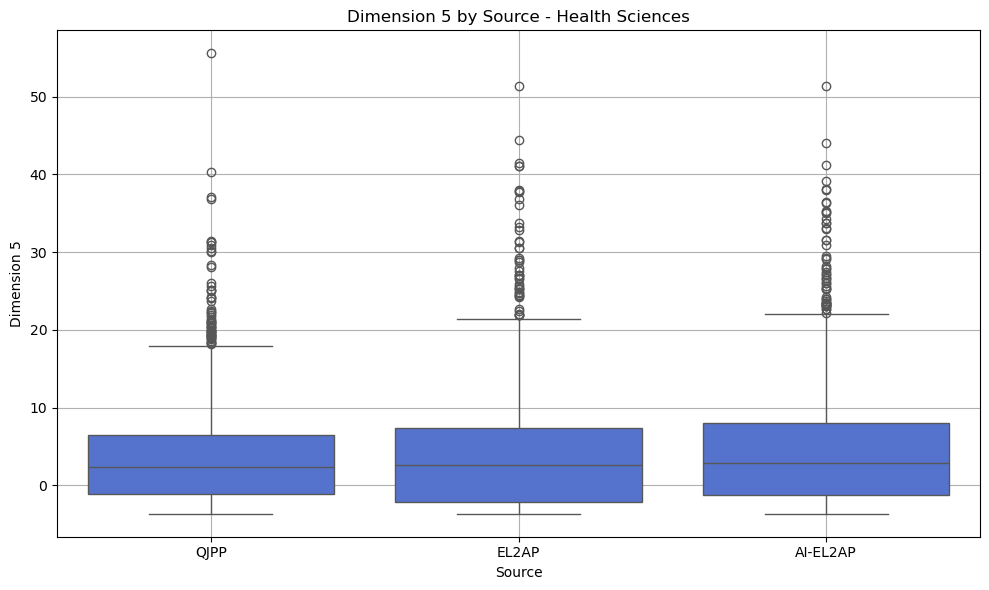

In [46]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim5_by_source_health_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 5', 'Health Sciences', source_order=custom_order)

#### `Biological Sciences` discipline

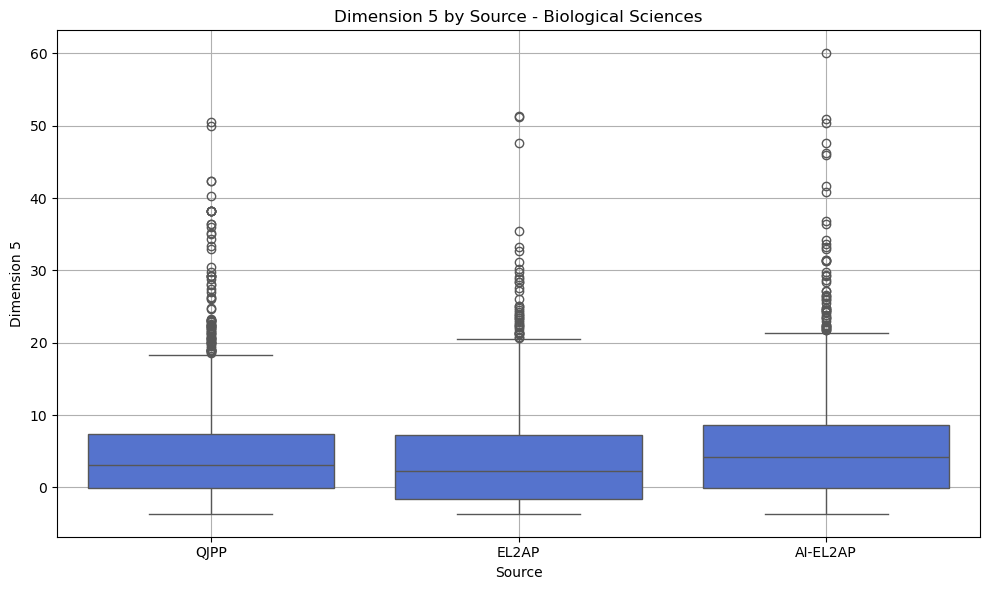

In [47]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim5_by_source_biological_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 5', 'Biological Sciences', source_order=custom_order)

#### `Human Sciences` discipline

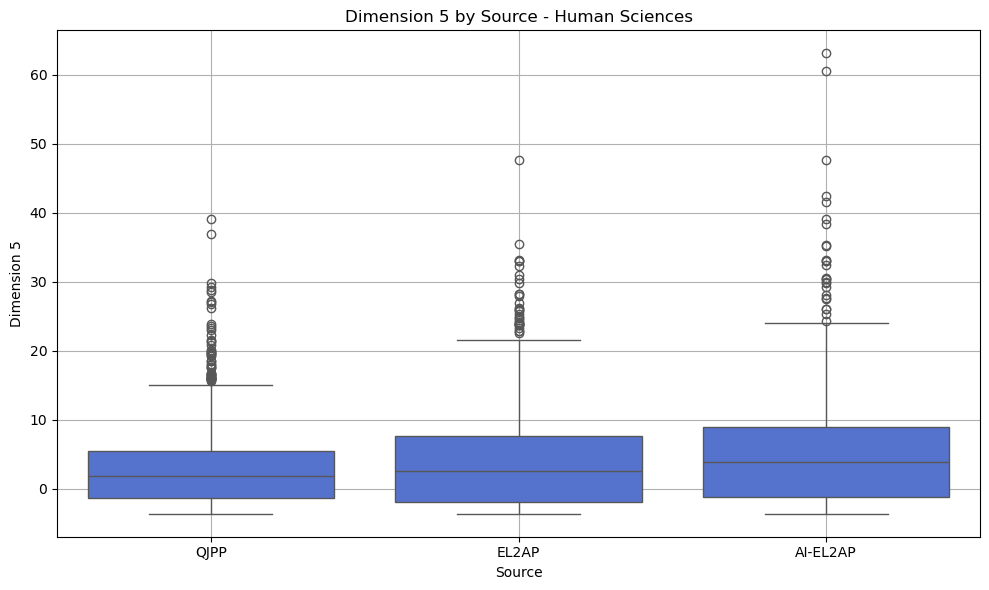

In [48]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim5_by_source_human_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 5', 'Human Sciences', source_order=custom_order)

#### `Applied Social Sciences` discipline

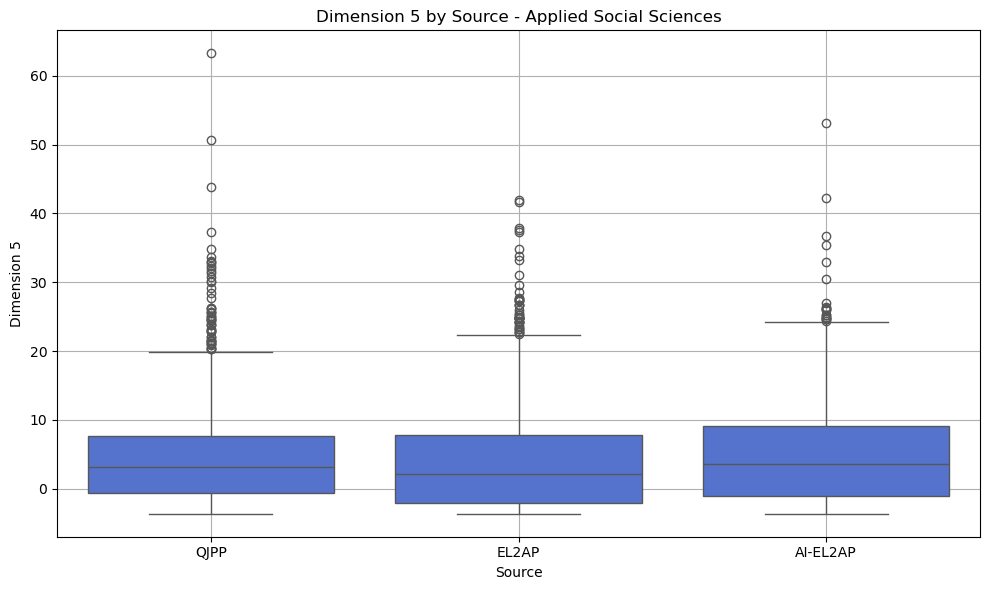

In [49]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim5_by_source_applied_social_sciences'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 5', 'Applied Social Sciences', source_order=custom_order)

#### `Linguistics, literature and arts` discipline

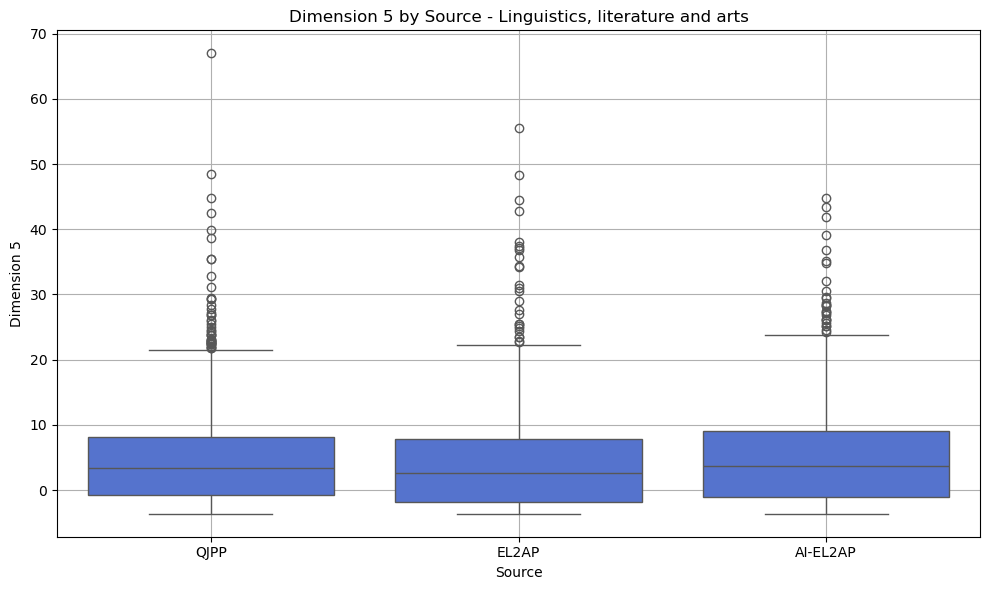

In [50]:
custom_order = ['QJPP', 'EL2AP', 'AI-EL2AP']
filename = 'dim5_by_source_linguistics_literature_arts'
plot_filepath = f"{output_directory}/{filename}.png"
boxplot_by_source(plot_filepath, 'Dimension 5', 'Linguistics, literature and arts', source_order=custom_order)

## Prepare data set for SAS

In [51]:
df_cl_st1_eyamrog_dimensions_sas = df_cl_st1_eyamrog_dimensions.drop(columns=['Published', 'Text Paragraph'])

### Exporting to files

In [52]:
df_cl_st1_eyamrog_dimensions_sas.to_json(f"{output_directory}/df_cl_st1_eyamrog_dimensions_sas.jsonl", orient='records', lines=True)

In [53]:
df_cl_st1_eyamrog_dimensions_sas.to_csv(f"{output_directory}/df_cl_st1_eyamrog_dimensions_sas.tsv", sep='\t', index=False, encoding='utf-8', lineterminator='\n')

In [54]:
df_cl_st1_eyamrog_dimensions_sas.to_excel(f"{output_directory}/df_cl_st1_eyamrog_dimensions_sas.xlsx")